In [34]:
import sys

In [35]:
sys.path.append('../tools/')

In [36]:
from tracktor_utils import tracker_obj

from tracktor.utils import interpolate

In [37]:
tracker = tracker_obj("../tracking_wo_bnw/")

In [38]:
tracker.reset()

In [39]:
import cv2
cap = cv2.VideoCapture('../samples/mot16.webm')

In [40]:
counter = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    break
    
cap.release()
cv2.destroyAllWindows()

In [41]:
import matplotlib.pyplot as plt

%matplotlib inline

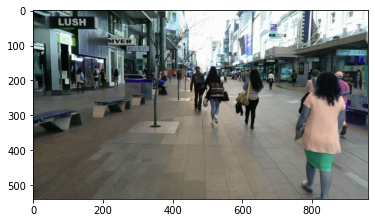

In [42]:
plt.imshow(frame)

In [43]:
from torchvision.transforms import ToTensor, Compose, Resize, ToPILImage


In [44]:
import cv2

In [45]:
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
transforms = Compose([
    ToPILImage(),
    Resize((749, 1333)),
    ToTensor(),
])

In [46]:
frame_batch = {
    'img': transforms(frame).unsqueeze(0)
}

In [47]:
tracker.step(frame_batch)


In [48]:
results = tracker.get_results()

In [49]:
results = interpolate(results)

In [50]:
x1, y1, x2, y2 = 0, 0, 0, 0 
for k, v in results.items():
    x1, y1, x2, y2 = map(int, v[max(v, key=int)])
    
#     y1 = int(y1 * frame.shape[0] / 749)
#     y2 = int(y2 * frame.shape[0] / 749)

#     x1 = int(x1 * frame.shape[1] / 1333)
#     x2 = int(x2 * frame.shape[1] / 1333)
    print(x1, y1, x2, y2)

313 226 344 304
1043 238 1234 749
623 219 685 400
931 238 961 317
1027 236 1052 301
681 216 756 455
567 224 594 303
838 214 922 469
167 235 206 331
239 225 267 314
756 238 774 285
1184 245 1267 490
259 229 290 312
538 241 553 287
774 237 790 276
808 236 826 281


In [51]:
i = transforms(frame).numpy()

In [52]:
from  matplotlib import patches

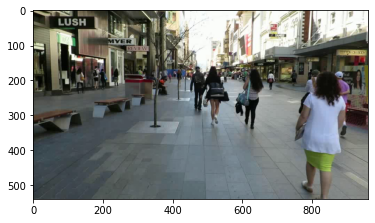

In [54]:
figure, ax = plt.subplots(1)

rect = patches.Rectangle((y1, x1), y2 - y1, x2 - x1, edgecolor='r', facecolor="none")

ax.imshow(frame)


ax.add_patch(rect)

In [21]:
x1, y1, x2, y2

(808, 236, 826, 281)

In [32]:
x1, x2, y1, y2 = 216, 237, 160, 217